In [1]:
#10
import numpy as np
import scipy
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

def RandomTF(countAll=1000,howOfften=100):
    ''' рандомный лист True/False с вашей длиной '''
    return [random.randrange(howOfften)==0 for x in list(range(countAll)) ]

def customWhere(series,WhereTFArr):
    '''они должны иметь одинаковые длины'''
    return series[WhereTFArr]

def plotBO(x,y,length=1000,size=8,alpha=0.4,xcut=None,ycut=None):#,height=None,width=None):
    '''
    Юзай для размера plt.rcParams['figure.figsize']=(250,10)
    plt.grid(axis='y')    для сетки или 'both'
    '''
    fig, ax = plt.subplots()#figsize=(height, width))

    # обезаем график
    print('было y',ax.get_ylim())
    if(ycut):
        ax.set_ylim(min(y),ycut)
    print('стало get_ylim',ax.get_ylim())
    if(xcut):
        ax.set_xlim(min(x),xcut)  
    
    l=length
    plt.scatter(x[:l],y[:l], s=size,alpha=alpha)#,figsize=(height,width))
    plt.show()
    

def my_accuracyArr(valid,pred):
    '''выдаёт средний процент отклонения pred от valid'''
    def avgBadArr(my_accRes):
        def avgBad(x):
            if(x>1):
                return (x-1)*100
            else:
                return (1-x)*100

        bads=[avgBad(x) for x in my_accRes]
        print('среднее отклонение по массиву= '+ str(np.mean(bads)))
        return np.mean(bads), bads
    
    if(len(valid)!=len(pred)):
        Exception('разные длины!!!')
    
    valPred= np.array([valid.tolist() ,pred])
    valPred=valPred.T
    my_accRes=[x[0]/x[1] for x in valPred]
    my_accRes=np.round(my_accRes,2)
    
    mean,bads=avgBadArr(my_accRes)
    return mean#,bads,my_accRes



 reading qwe000000000000.csv
1000
csvs return
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
vendor_id            1000 non-null object
pickup_datetime      1000 non-null datetime64[ns]
pickup_longitude     1000 non-null float64
pickup_latitude      1000 non-null float64
dropoff_longitude    1000 non-null float64
dropoff_latitude     1000 non-null float64
rate_code            363 non-null float64
passenger_count      1000 non-null int64
trip_distance        1000 non-null float64
fare_amount          1000 non-null float64
tolls_amount         1000 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 86.0+ KB


NameError: name 'r' is not defined

NameError: name 'r' is not defined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
vendor_id            100 non-null object
pickup_datetime      100 non-null datetime64[ns]
pickup_longitude     100 non-null float64
pickup_latitude      100 non-null float64
dropoff_longitude    100 non-null float64
dropoff_latitude     100 non-null float64
rate_code            22 non-null float64
passenger_count      100 non-null int64
trip_distance        100 non-null float64
fare_amount          100 non-null float64
tolls_amount         100 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 8.7+ KB


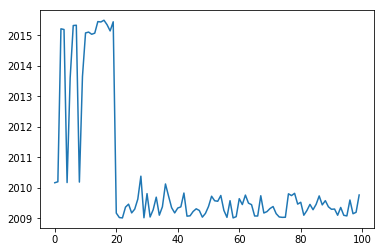

In [2]:
import NumpyAlg_preprocessing as fe

In [3]:
data=fe.create_features(fe.csvs('qqqmyAll',nrows=1000
                                *1000
                                *0.85
                                *50
                               ))

 reading qqqmyAll
200361


In [ ]:
print(data.columns)
qw=data.groupby(["dropoff_longitude","fare"]).size().unstack()
plt.rcParams['figure.figsize']=(100,50)

qw[:10].plot(legend=None,xlim=[-74.02,-73.94])

In [ ]:
#%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.figsize']=(250,10)


X=data[['trip_distance','rate_code',]]#'p_hour']] # не разницы что с или без hour !! ну чуть чуть
# X=X.drop('fare',axis=1)
# X=X.drop('vendor_id',axis=1)

# сделаем категориальные из p_hour
g=pd.Categorical(data.iloc[:,9])
d=pd.get_dummies(g)
X=data2 =pd.DataFrame(np.c_[X,d])# ,columns=data.columns+d.columns)

# сделаем категориальные из p_hour
g=pd.Categorical(data.iloc[:,10])
d1=pd.get_dummies(g)
X=data2 =pd.DataFrame(np.c_[X,d1])# ,columns=data.columns+d.columns)

# pickup_longitude     
g=pd.Categorical(data.iloc[:,1])
d=pd.get_dummies(g)
# X=data2 =pd.DataFrame(np.c_[X,d])# ,columns=data.columns+d.columns)

# # pickup_Lat   
g=pd.Categorical(data.iloc[:,2])
d=pd.get_dummies(g)
# X=data2 =pd.DataFrame(np.c_[X,d])# ,columns=data.columns+d.columns)


a=X
# a['p_hour']=pd.Categorical(data[['p_hour']])
#np.array([X.trip_distance,X.rate_tcode])
#a=a.T

y=data['fare']
X

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(a, y, train_size=0.75, random_state=42)
r,q,q1,q2=np.linalg.lstsq(X_train,y_train)


In [ ]:
pred=np.dot(X_validation, r)

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_validation.tolist(), pred))
print('impo')
# print(r.ravel())
rms
# print(preк

# print(y_validation.tolist())


In [ ]:

my_accRes= my_accuracyArr(y_validation,pred)
#my_accRes[0]
#: 2 17.4 3.2
#: 1,2 - 17.5
#без 17.7
# 9 17.38 3.1
# 9,10 17.0 3.15

In [ ]:

#plt.rcParams['figure.figsize']=(250,10)
#графики в svg выглядят более четкими

plt.plot(y_validation.tolist()[:100],linewidth=0.1)
plt.plot(pred[:100],'red',linewidth=0.2)
plt.show()

In [ ]:
o=[[2,2],[4,8]]
p=[1,4]
np.linalg.solve(o,p)

In [ ]:
randTFArr=RandomTF(len(data),1)
xx=data.trip_distance[randTFArr]
xx=data.p_hour[randTFArr]
yy=data.fare[randTFArr]

plt.rcParams['figure.figsize']=(1.5,5)
# plotBO(xx,yy,1000000,1,0.1,None,66)
# plt.plot([1,2],[2,3])


In [ ]:

randTFArr=RandomTF(len(data),20)
xx=data.trip_distance[randTFArr]
xx=data.rate_code[randTFArr]
yy=data.fare[randTFArr]
# plotBO(xx,yy,1000000,1)
# len(xx)